### Data Experiment
- Optimizer Experiment <br>
- Model Experiment

In [1]:
# Import basic necessities
import pandas as pd
import os
import numpy as np

import tensorflow as tf
from tensorflow import keras

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
drivers_df = pd.read_csv("ready_db/drviers.csv")
drivers_df.head()

,DRIVER_ID,GENDER,CREDIT_SCORE,AGE,VEHICLE_ID
0,1,2.0,824,27.0,7420963
1,2,1.0,824,28.0,7420963
2,3,2.0,666,51.0,7396448
3,4,2.0,666,34.0,6208988
4,5,2.0,824,88.0,6078430


In [3]:
drivers_df = drivers_df.dropna()
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 0 to 735
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DRIVER_ID     726 non-null    int64  
 1   GENDER        726 non-null    float64
 2   CREDIT_SCORE  726 non-null    int64  
 3   AGE           726 non-null    float64
 4   VEHICLE_ID    726 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 34.0 KB


In [4]:
#see how vehicl_id is spread - Cut off less than 3 inclined to say less than 8 later
v = drivers_df.CREDIT_SCORE.value_counts()
drivers_df = drivers_df[drivers_df.CREDIT_SCORE.isin(v.index[v.gt(2)])]
drivers_df.CREDIT_SCORE.value_counts()

750    225
824    192
666    168
847     71
768     13
454      8
395      8
546      3
654      3
Name: CREDIT_SCORE, dtype: int64

<AxesSubplot:xlabel='GENDER', ylabel='CREDIT_SCORE'>

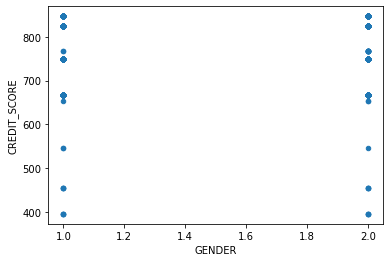

In [5]:
from matplotlib.colors import BoundaryNorm
%matplotlib inline
import matplotlib.pyplot as plt
drivers_df.plot(x='GENDER', y='CREDIT_SCORE', kind='scatter')

<AxesSubplot:xlabel='CREDIT_SCORE', ylabel='VEHICLE_ID'>

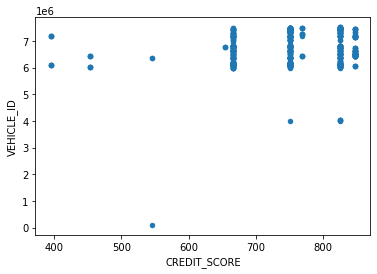

In [6]:
from matplotlib.colors import BoundaryNorm
%matplotlib inline
import matplotlib.pyplot as plt
drivers_df.plot(x='CREDIT_SCORE', y='VEHICLE_ID', kind='scatter')

In [7]:
# Remove creadit score outcome target from fetures data
y = drivers_df['CREDIT_SCORE']
X = drivers_df.drop(columns='CREDIT_SCORE')

In [8]:
# Split the features
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [9]:
# Standardize - Process numerical data for neural network model
# Create Scaler
scaler = StandardScaler()
#Fit
X_scaler = scaler.fit(X_train)
#.values.reshape(-1,1)
# Transform 
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# LogisticRegression class in the linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# lbfgs is an algorithm for learning an doptimaizaation
logic_classifier = LogisticRegression(solver='lbfgs', max_iter=200)

# Train the model (run)
logic_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = logic_classifier.predict(X_test)

# Print the result
print(f" Logistic regression model accuracy : {accuracy_score(y_test, y_pred):.3f}")

 Logistic regression model accuracy : 0.324


In [11]:
# Using K-means
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10, init='random', n_init=10, max_iter=500, tol=1e-04, random_state=0)
y_km=km.fit_predict(X)
print(y_km)

[8 8 8 1 1 2 1 8 1 3 5 8 1 7 8 8 8 1 2 1 2 1 2 1 2 1 2 1 8 1 8 1 8 1 8 1 8
 1 8 1 8 1 8 1 8 1 8 1 8 1 8 1 1 2 1 2 1 4 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 5 1 9 8 7 5 3 3 3 1 1 2 1 2 1 2 1 2 1 1 8 5 3 2 5 5 0 0 0 8 8 4 4
 9 7 1 1 1 0 9 0 9 0 8 1 8 2 8 2 5 5 5 9 9 9 9 5 7 5 7 2 9 9 3 9 5 5 5 5 9
 1 0 2 8 1 1 1 1 4 4 1 1 9 0 0 1 1 8 8 9 9 9 9 1 1 1 9 2 8 2 8 2 1 8 1 8 9
 9 5 8 8 9 8 9 8 9 8 9 1 1 1 1 1 1 1 1 1 8 8 9 9 9 9 9 9 9 9 1 9 8 9 8 9 8
 9 8 8 8 1 3 1 3 1 3 1 3 1 9 8 9 3 9 3 9 3 9 3 8 1 8 1 8 1 8 1 8 9 5 9 5 9
 9 5 9 5 9 1 8 8 5 1 2 1 1 2 1 1 2 1 1 9 1 2 1 1 9 3 8 1 8 9 1 0 1 0 1 0 1
 0 1 0 7 2 0 7 1 6 5 1 1 2 9 8 1 5 0 9 1 1 8 8 8 8 8 8 8 8 7 3 1 1 2 1 2 1
 2 1 2 1 1 5 5 7 7 7 2 3 8 3 8 3 8 3 8 2 8 8 8 8 7 3 0 3 0 3 0 3 0 2 2 9 3
 8 3 8 3 8 3 8 2 7 7 0 9 3 5 3 5 3 5 3 5 8 3 3 3 3 3 8 8 5 0 7 7 0 7 7 0 7
 7 0 7 7 0 7 7 0 7 7 0 7 7 0 7 7 0 7 7 7 7 9 9 9 7 7 0 8 0 8 4 8 4 1 7 7 5
 5 8 7 8 5 1 1 5 3 5 3 3 5 3 3 5 3 3 5 3 3 5 3 3 5 3 3 5 3 3 5 3 3 5 3 3 5
 3 3 5 3 3 5 3 1 1 1 1 1 

In [12]:
sum_distances = []
K = range(1, 15)

for k in K:
    km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=500, tol=1e-04, random_state=0)
    km = km.fit(X)
    sum_distances.append(km.inertia_)


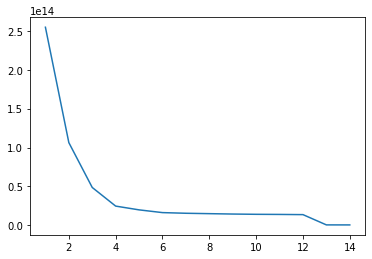

In [13]:
plt.plot(K, sum_distances)

In [14]:
# let's try Feature Component Analysis
features = drivers_df[['GENDER', 'CREDIT_SCORE', 'AGE', 'VEHICLE_ID']]


In [15]:
#Multilayer Perceptron: Hyperparameters ReLU - ractified Linear Unit
# import MLPClassifier and MLPregessor from sklearn - activation(sigmoid, TanH, ReLU), 
# learning_rate (how quickly find a solution, how many steps (small or big)) and hiddenlayer_size
from sklearn.neural_network import MLPRegressor, MLPClassifier
print(MLPRegressor())
print(MLPClassifier())

MLPRegressor()
MLPClassifier()


In [16]:
def print_results(results):
    print('The best parameters: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std *2, 3), params))

In [17]:
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=100,activation = 'relu',solver='adam',random_state=1)
classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=100, random_state=1)

### What about GridSearchCV?
It runs through all the different parameters that is fed into the parameter grid 
and produces the best combination of parameters, based on a scoring metric of your choice (accuracy, f1, etc)
cons: process is time-consuming?

In [142]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
knn_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())])
params = [{'knn__n_neighbors': [7, 9, 11, 13],
         'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': [15, 20]}]
gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_knn.fit(X_train, y_train)
print_results(gs_knn)
# find best model score
gs_knn.score(X_train, y_train)

The best parameters: {'knn__leaf_size': 15, 'knn__n_neighbors': 11, 'knn__weights': 'distance'}

0.568 (+/-0.073) for {'knn__leaf_size': 15, 'knn__n_neighbors': 7, 'knn__weights': 'uniform'}
0.732 (+/-0.093) for {'knn__leaf_size': 15, 'knn__n_neighbors': 7, 'knn__weights': 'distance'}
0.537 (+/-0.089) for {'knn__leaf_size': 15, 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}
0.73 (+/-0.095) for {'knn__leaf_size': 15, 'knn__n_neighbors': 9, 'knn__weights': 'distance'}
0.517 (+/-0.088) for {'knn__leaf_size': 15, 'knn__n_neighbors': 11, 'knn__weights': 'uniform'}
0.734 (+/-0.105) for {'knn__leaf_size': 15, 'knn__n_neighbors': 11, 'knn__weights': 'distance'}
0.504 (+/-0.099) for {'knn__leaf_size': 15, 'knn__n_neighbors': 13, 'knn__weights': 'uniform'}
0.73 (+/-0.098) for {'knn__leaf_size': 15, 'knn__n_neighbors': 13, 'knn__weights': 'distance'}
0.568 (+/-0.073) for {'knn__leaf_size': 20, 'knn__n_neighbors': 7, 'knn__weights': 'uniform'}
0.732 (+/-0.093) for {'knn__leaf_size': 20, 'knn__n

1.0